# **CS985/6 Spotify Classification Problem 2025**

---

## Table of contents

1. [Team Members](#team)
2. [Introduction](#introduction)
3. [License](#license)
4. [Requirement](#requirement)
5. [Data Overview](#data_overview)
6. [Missing Values and Data Cleansing](#data_cleansing)
7. [Exploratory Data Analysis](#eda)
8. [Data Preparation and Feature Engineering](#feature_engineering)
9. [Modeling](#modeling)
10. [Conclusion](#conclusion)
---

<a id='team'></a>
## ML&DL legends
---
REATEGUI RANGEL ALEXANDER   202453606 (Group Leader) <br>
BENJAMASUTIN PITTAYUT   202460837 <br>
CHOUBISA VIBHUTI    202466198 <br>
Tam Sai Hou 202455347 <br>
ZHAO YUHUA  202469614 <br>

<a id = "introduction"></a>
## Introduction

In this digital age, music streaming platform spotify has become a part of our daily life, offering users personalized experience based on their preferences. One of the key aspects of personalizing these services is music genre classification. By categorizing songs into predefined genres, platforms can better recommend songs to users, create target playlists and even enhance content discovery.  The objective of this assignment is to build a machine learning model that predicts classifications based on Spotify music characteristic data. The task of predicting a song's genre is often a complex challenge, influenced by various features such as tempo, energy level, and acoustics. 

The primary objective of this project is to predict the top genre of a song using its associated features. This genre prediction can help improve music recommendation systems, enabling better user experiences by offering personalized content based on users' preferences for specific genres. Additionally, genre classification can assist in music analytics, market segmentation, and tracking trends within the music industry.  

This report presents the complete workflow of solving the music genre classification problem. It covers data preprocessing, exploratory data analysis (EDA), model development, and evaluation. Various machine learning techniques, including logistic regression and deep learning models, are employed to assess their performance in predicting the top genre. The goal is to develop a robust model that can make accurate genre predictions based on song features. 

The process involved data preprocessing, exploratory data analysis, model selection, hyperparameter tuning, and feature selection. Several challenges were encountered, including skewed data distributions, imbalanced target classes, and overfitting issues. 

---

<a id ="license"></a>
## License
Data : [Kaggle Spotify Classification Problem Dataset](https://www.kaggle.com/competitions/cs-985-6-spotify-classification-problem-2025)

---

<a id="requirement"></a>

## Requirement

The required packages for running this notebook are listed below:

---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

<a id="data_overview"></a>

## Data Overview

---
There are two csv files for the classification problem dataset. The training dataset (CS98XClassificationTrain.csv) and the testing dataset (CS98XClassificationTest.csv).

In [ ]:
train_data = pd.read_csv('CS98XClassificationTrain.csv')
test_data = pd.read_csv('CS98XClassificationTest.csv')

#Overview of dataset
train_column = len(train_data.columns)
train_row = len(train_data)
print('There are {} columns in train_data'.format(train_column))
print('There are {} rows in train_data'.format(train_row))

There are 15 columns in train_data
There are 453 rows in train_data


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   year       453 non-null    int64 
 4   bpm        453 non-null    int64 
 5   nrgy       453 non-null    int64 
 6   dnce       453 non-null    int64 
 7   dB         453 non-null    int64 
 8   live       453 non-null    int64 
 9   val        453 non-null    int64 
 10  dur        453 non-null    int64 
 11  acous      453 non-null    int64 
 12  spch       453 non-null    int64 
 13  pop        453 non-null    int64 
 14  top genre  438 non-null    object
dtypes: int64(12), object(3)
memory usage: 53.2+ KB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      113 non-null    int64 
 1   title   113 non-null    object
 2   artist  113 non-null    object
 3   year    113 non-null    int64 
 4   bpm     113 non-null    int64 
 5   nrgy    113 non-null    int64 
 6   dnce    113 non-null    int64 
 7   dB      113 non-null    int64 
 8   live    113 non-null    int64 
 9   val     113 non-null    int64 
 10  dur     113 non-null    int64 
 11  acous   113 non-null    int64 
 12  spch    113 non-null    int64 
 13  pop     113 non-null    int64 
dtypes: int64(12), object(2)
memory usage: 12.5+ KB


In [ ]:
train_data.head()

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre
0,1,My Happiness,Connie Francis,1996,107,31,45,-8,13,28,150,75,3,44,adult standards
1,2,Unchained Melody,The Teddy Bears,2011,114,44,53,-8,13,47,139,49,3,37,NaN
2,3,How Deep Is Your Love,Bee Gees,1979,105,36,63,-9,13,67,245,11,3,77,adult standards
3,4,Woman in Love,Barbra Streisand,1980,170,28,47,-16,13,33,232,25,3,67,adult standards
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,1973,121,47,56,-8,15,40,193,45,3,63,glam rock


The raw training dataset contain 453 rows and 15 column and the test set has 113 rows and 14 columns. The test dataset does not has the "top genre" column which is the prediction column of this classification problem.

---
<a id="data_cleansing"></a>

## Missing Values and Data Cleansing

---
The data is rich in numeric and categorical values and initially the top genre column had 
15 NaN values. The rows contain NaN values are removed from the training dataset. The test set is checked for missing values but remains otherwise unchanged.

In [ ]:
# Missing values
train_missing = train_data.isnull().sum().sum()
print('There are {} missing values in the training dataset.'.format(train_missing))
test_missing = test_data.isnull().sum().sum()
print('There are {} missing values in the test set.'.format(test_missing))

train_missing_rows = train_data.loc[train_data['top genre'].isnull() == True]
train_missing_rows

# Drop rows contain NaN
train_data = train_data.dropna()


There are 0 missing values in the training dataset.
There are 0 missing values in the test set.


<a id="eda"></a>

## Exploratory Data Analysis

---
Exploratory Data Analysis is performed to have better understanding on the distributions and correlations between input features.

This section explores the dataset's distribution and the relationships between features. Histograms visualize the distribution of numerical variables. Correlation matrix is used to identify how features are associated with popularity (pop). Violin plots provide insights into feature distributions and boxplots highlight the outliers.

C:\Users\nowja\AppData\Local\Temp\ipykernel_23676\1593270264.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


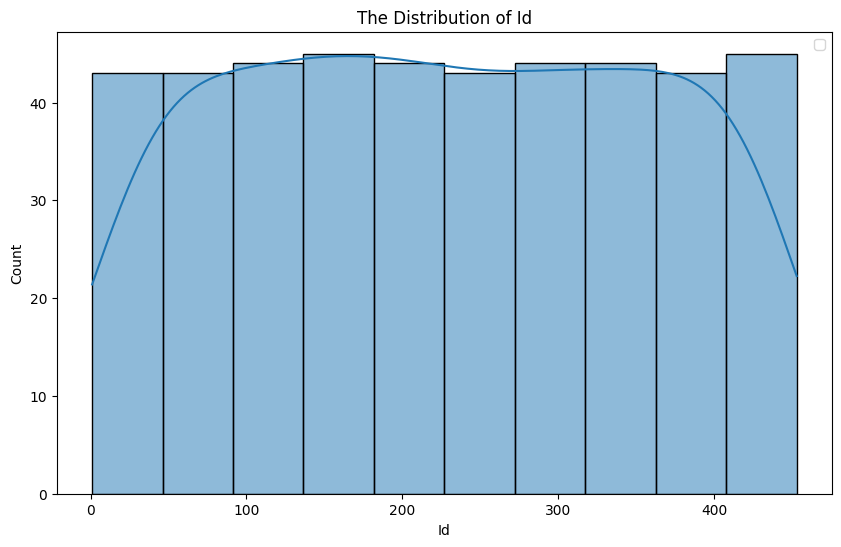

C:\Users\nowja\AppData\Local\Temp\ipykernel_23676\1593270264.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


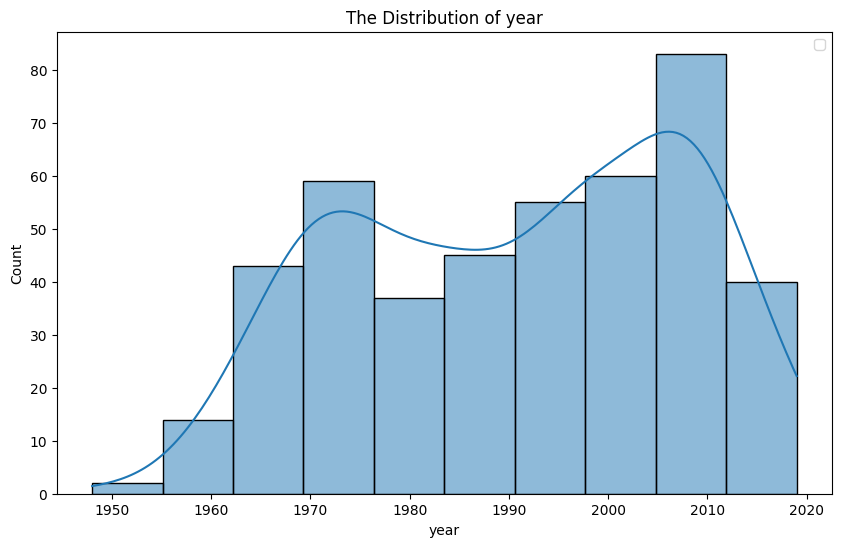

C:\Users\nowja\AppData\Local\Temp\ipykernel_23676\1593270264.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


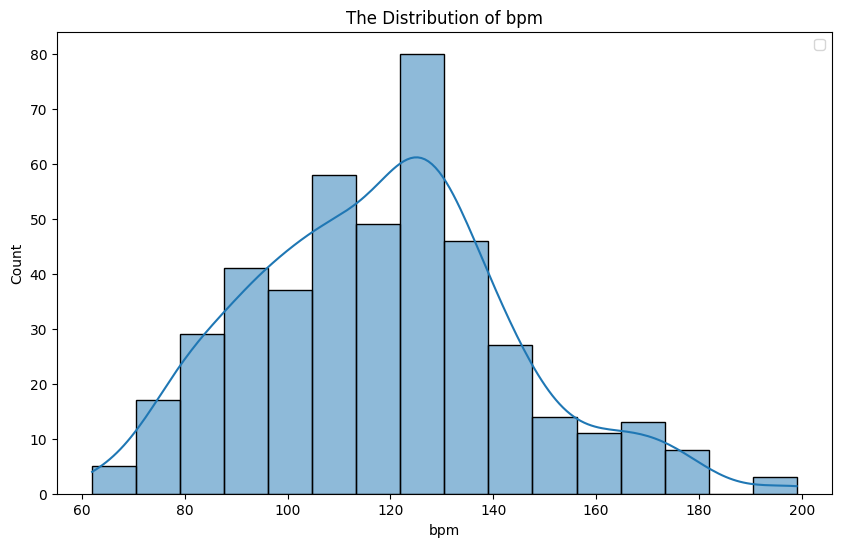

C:\Users\nowja\AppData\Local\Temp\ipykernel_23676\1593270264.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


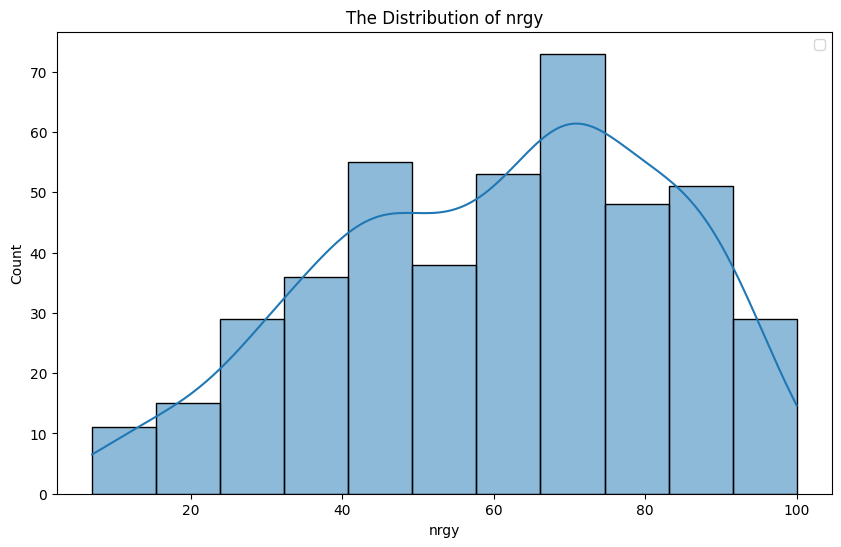

C:\Users\nowja\AppData\Local\Temp\ipykernel_23676\1593270264.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


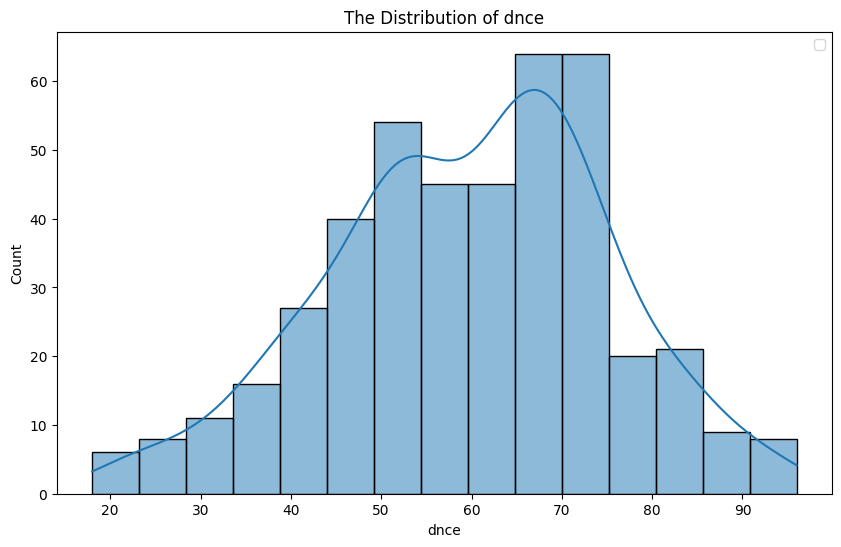

C:\Users\nowja\AppData\Local\Temp\ipykernel_23676\1593270264.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


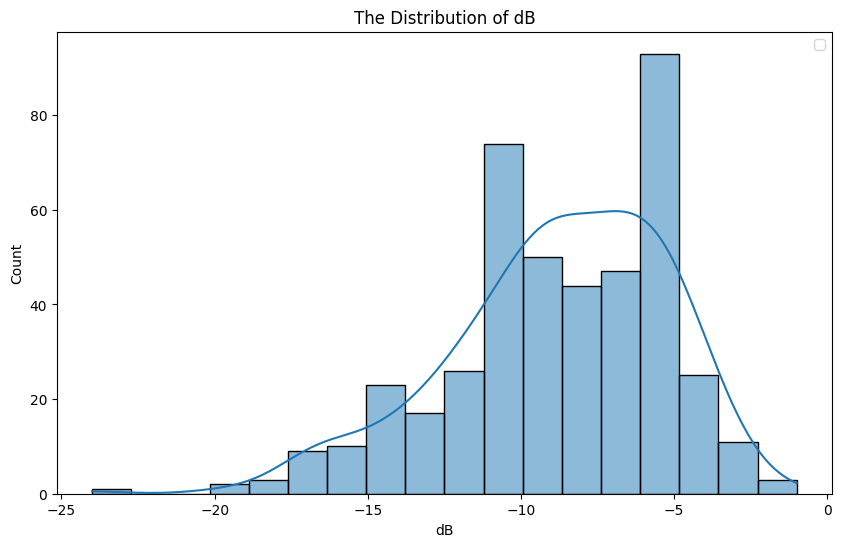

C:\Users\nowja\AppData\Local\Temp\ipykernel_23676\1593270264.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


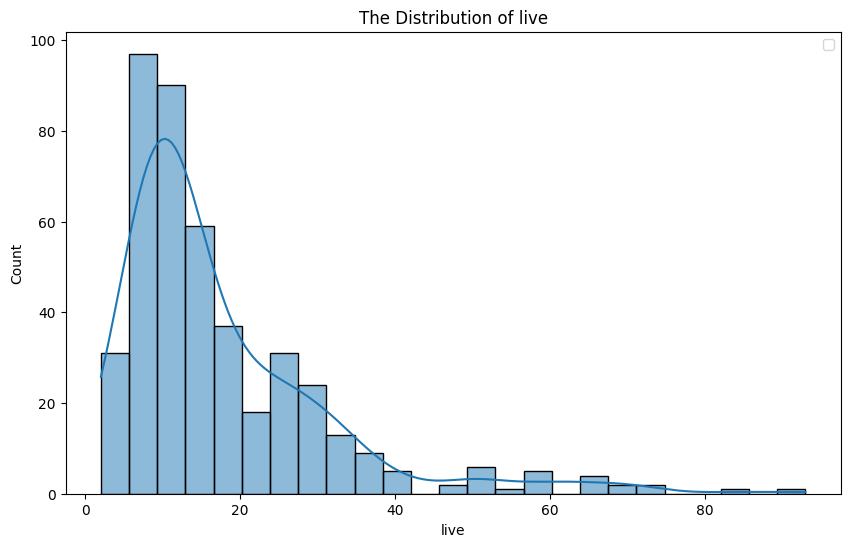

C:\Users\nowja\AppData\Local\Temp\ipykernel_23676\1593270264.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


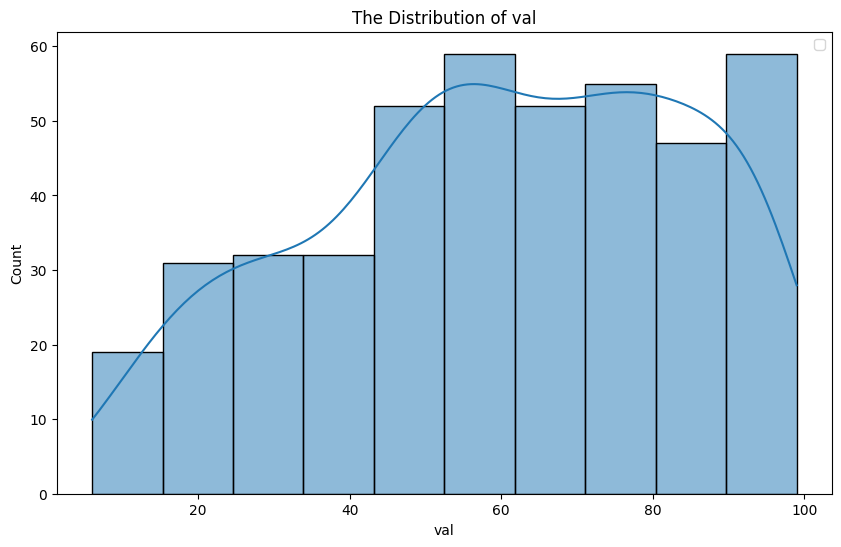

C:\Users\nowja\AppData\Local\Temp\ipykernel_23676\1593270264.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


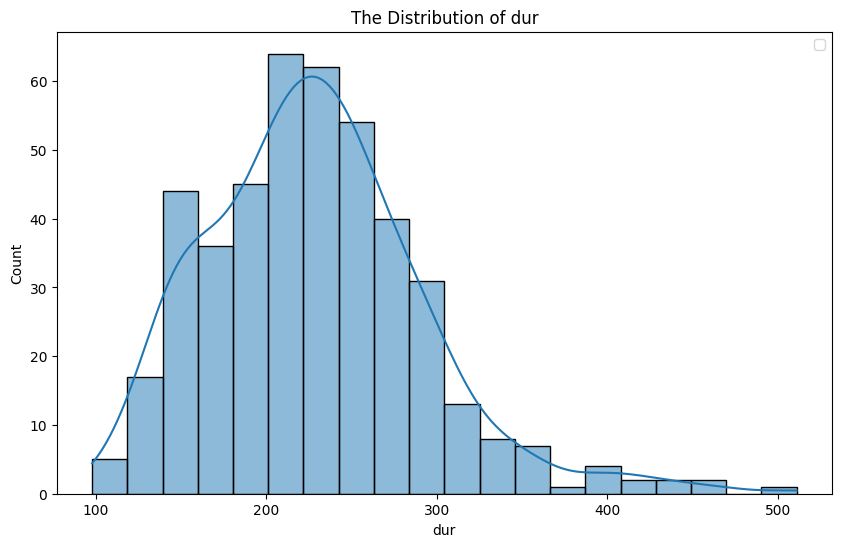

C:\Users\nowja\AppData\Local\Temp\ipykernel_23676\1593270264.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


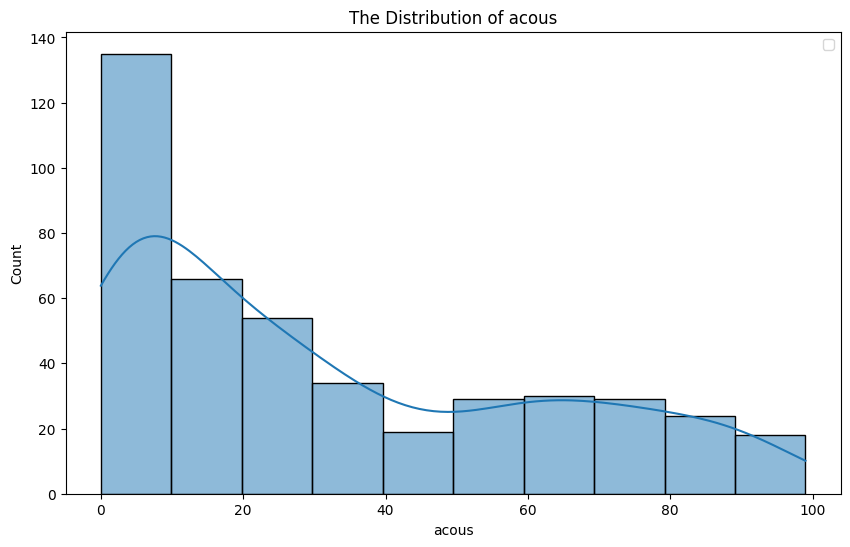

C:\Users\nowja\AppData\Local\Temp\ipykernel_23676\1593270264.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


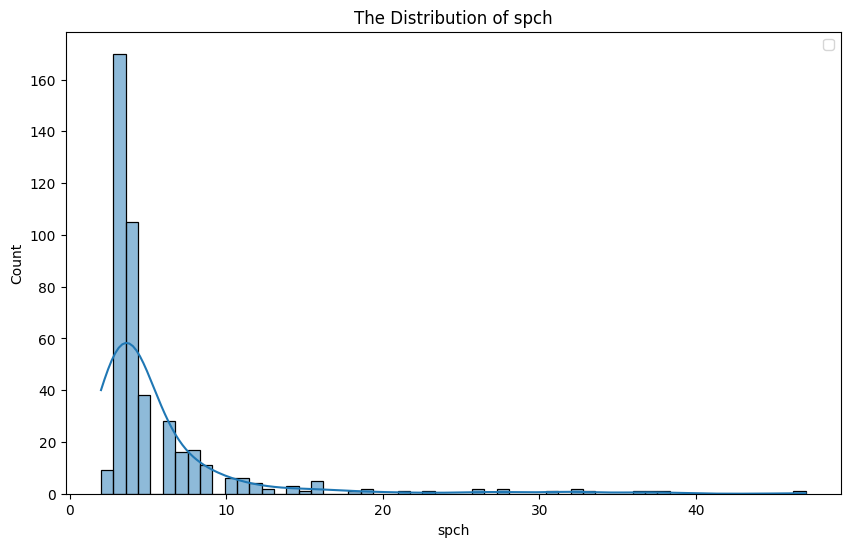

C:\Users\nowja\AppData\Local\Temp\ipykernel_23676\1593270264.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


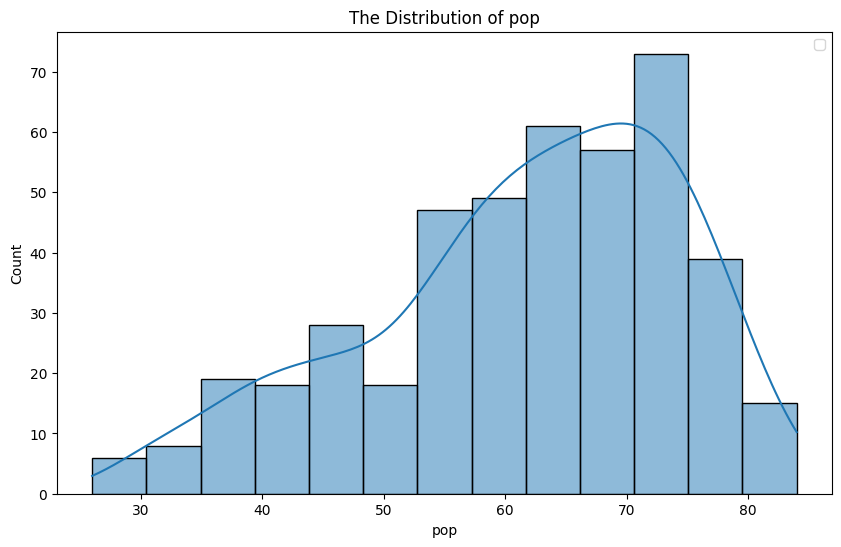

In [ ]:
train_numerical = train_data.select_dtypes(include=['int64','float64'])

for col in train_numerical:
    plt.figure(figsize=(10,6))
    sns.histplot(data=train_data,x=col,kde=True)
    plt.ylabel('Count')
    plt.title(f'The Distribution of {col}')
    plt.legend()
    plt.show()

**Histograms** <br>
Key features like bpm, dnce are close to symmetric and db, live, val, dur, acous, spch are more skewed.

In [ ]:
# Correlation matrix
corr_matrix = train_numerical.corr()
corr_matrix['pop'].sort_values(ascending = False)

pop      1.000000
dur      0.321028
dB       0.312952
nrgy     0.274006
dnce     0.256099
spch     0.130346
Id       0.072073
bpm      0.042695
year     0.018926
live    -0.025493
val     -0.040035
acous   -0.443763
Name: pop, dtype: float64

<Axes: >

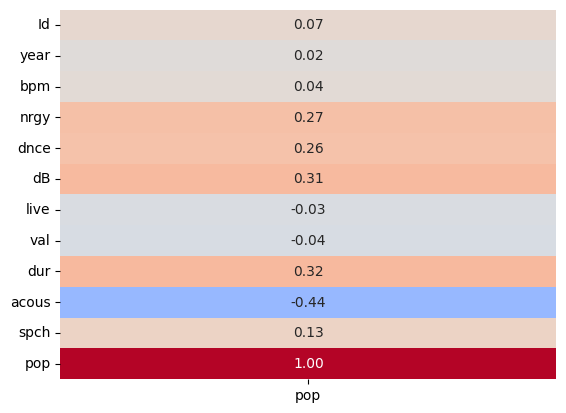

In [ ]:
corr_pop = corr_matrix['pop']
sns.heatmap(corr_pop.to_frame(), annot=True, cmap='coolwarm', center=0, fmt='.2f', cbar=False)

**Correlation Matrix** <br>
The correlation matrix indicated dur, nrgy, and dB show notably positive relationships with pop, while acous is fairly strongly and negatively correlated. This suggests that longer, louder, and more energetic tracks tend to be more popular, whereas very acoustic songs may attract fewer listeners.


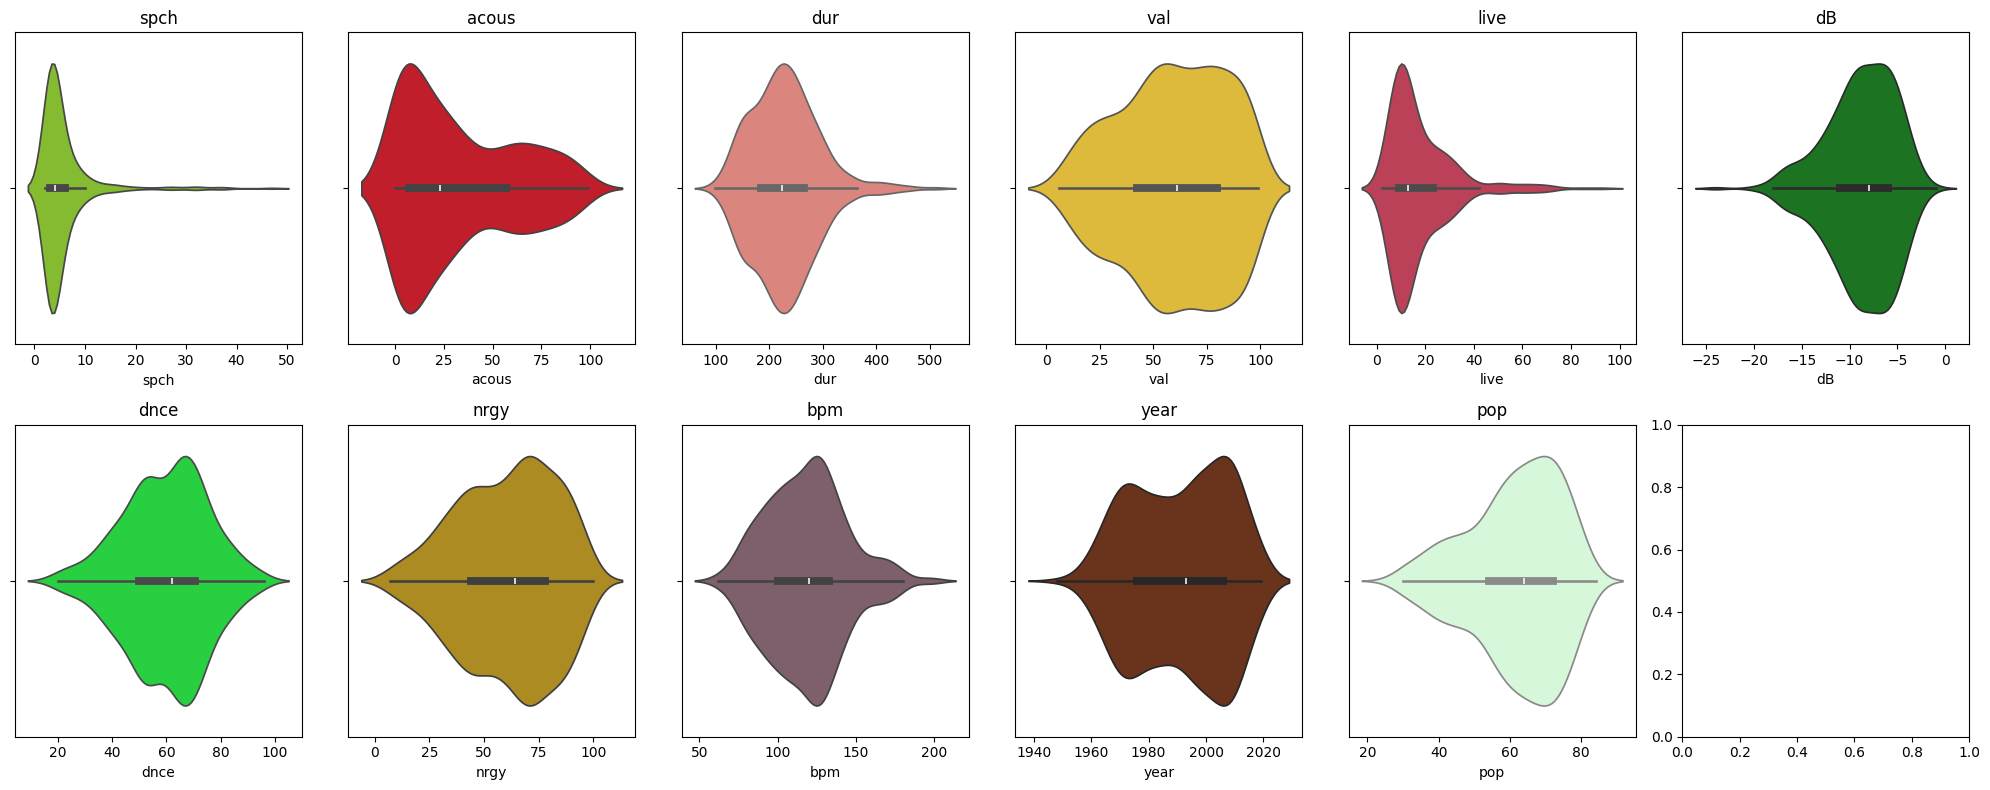

In [ ]:
# Violinplots
def plot_violinplots(data, features):
    fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(20, 8))
    axes = axes.ravel()  
    
    for i, feature in enumerate(features):
        color = np.random.rand(3,)  
        sns.violinplot(x=data[feature], ax=axes[i], color=color)
        axes[i].set_title(feature)
    
    plt.tight_layout()
    plt.show()

my_features = ['spch','acous','dur','val','live','dB','dnce','nrgy','bpm','year','pop']
plot_violinplots(train_numerical, my_features)

These violin plots highlight the shape and spread of each numeric feature, including any multi‐modality or skew. For example, spch and live are heavily right‐skewed with most values near zero, while dur shows a strong central peak around 180–220 seconds and a lighter tail of longer tracks. Other features (like acous and dB) span a broad range, revealing both very low/high acousticness and loudness outliers.

Summary stats for year:

count     438.000000
mean     1990.881279
std        16.697047
min      1948.000000
25%      1976.000000
50%      1993.000000
75%      2006.000000
max      2019.000000
Name: year, dtype: float64

Boxplot will show us spread and highlight outliers:



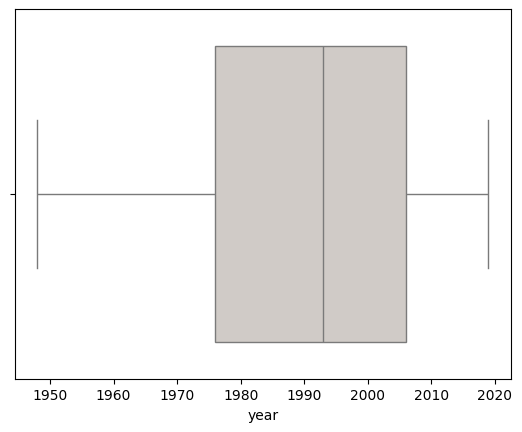


Scatterplot will show us relationship between year and pop:



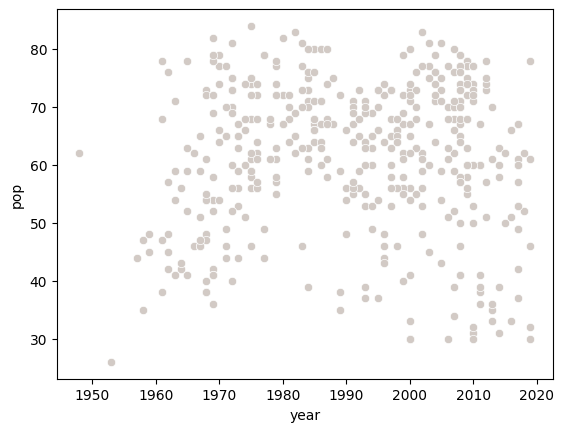

Summary stats for bpm:

count    438.000000
mean     118.326484
std       25.175735
min       62.000000
25%      100.000000
50%      120.000000
75%      133.000000
max      199.000000
Name: bpm, dtype: float64

Boxplot will show us spread and highlight outliers:



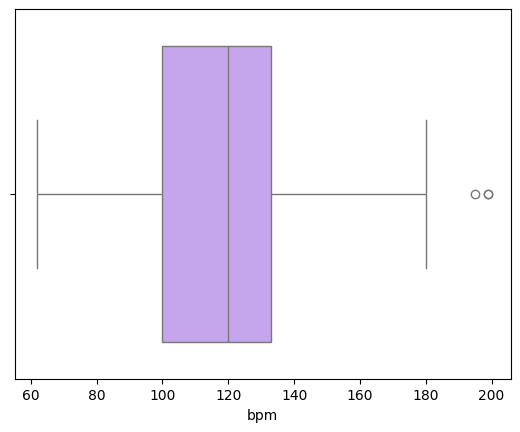


Scatterplot will show us relationship between bpm and pop:



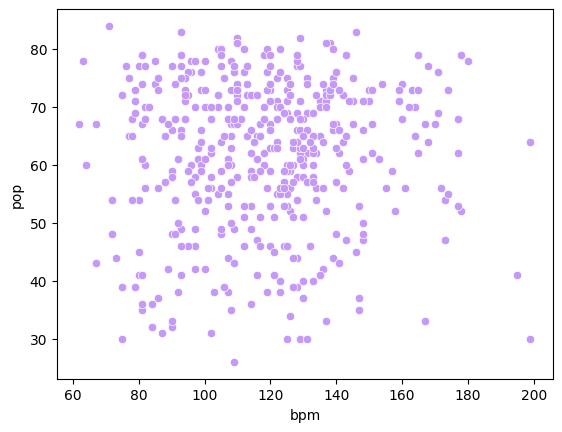

Summary stats for nrgy:

count    438.000000
mean      60.504566
std       22.089660
min        7.000000
25%       44.000000
50%       64.000000
75%       78.000000
max      100.000000
Name: nrgy, dtype: float64

Boxplot will show us spread and highlight outliers:



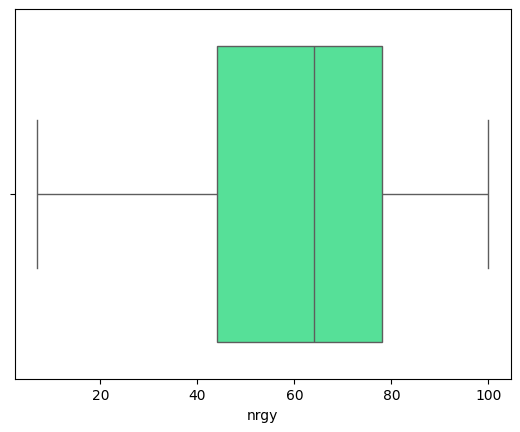


Scatterplot will show us relationship between nrgy and pop:



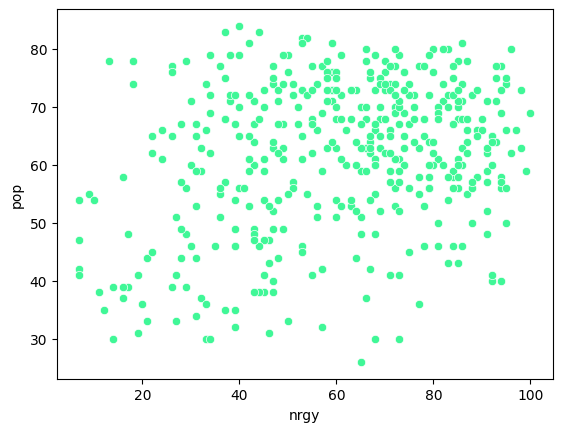

Summary stats for dnce:

count    438.000000
mean      59.780822
std       15.404757
min       18.000000
25%       50.000000
50%       62.000000
75%       70.750000
max       96.000000
Name: dnce, dtype: float64

Boxplot will show us spread and highlight outliers:



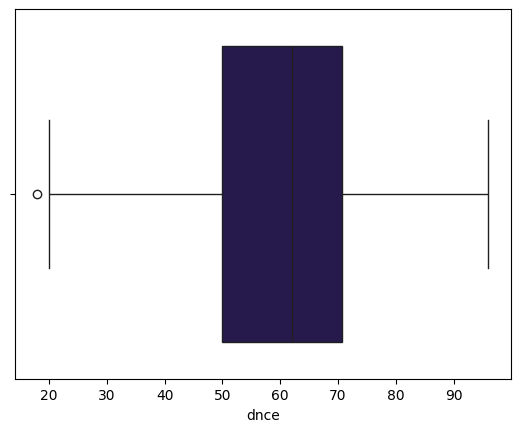


Scatterplot will show us relationship between dnce and pop:



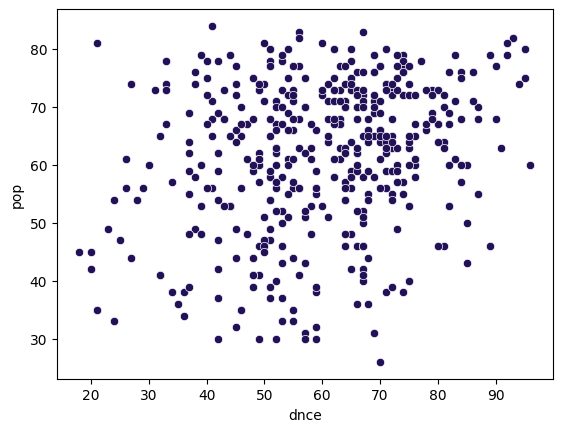

Summary stats for dB:

count    438.000000
mean      -8.787671
std        3.591005
min      -24.000000
25%      -11.000000
50%       -8.000000
75%       -6.000000
max       -1.000000
Name: dB, dtype: float64

Boxplot will show us spread and highlight outliers:



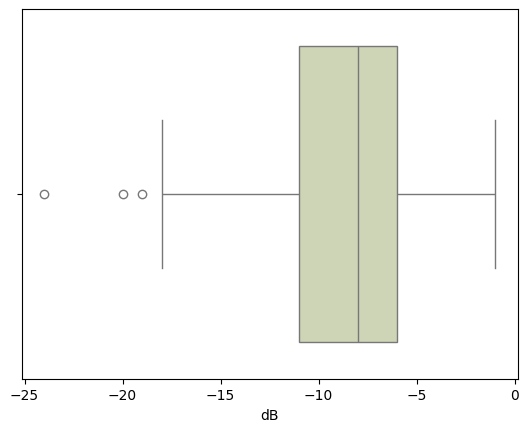


Scatterplot will show us relationship between dB and pop:



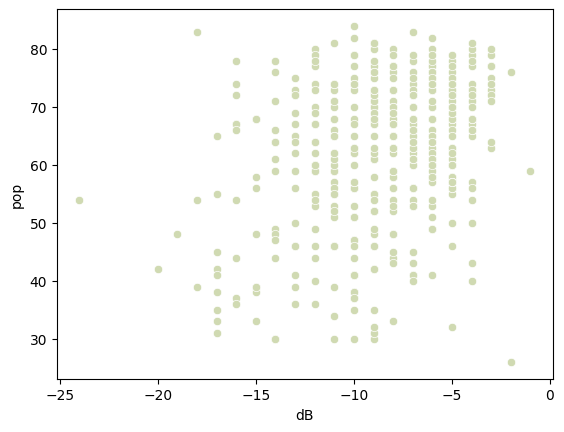

Summary stats for live:

count    438.000000
mean      17.605023
std       13.807492
min        2.000000
25%        9.000000
50%       13.000000
75%       23.000000
max       93.000000
Name: live, dtype: float64

Boxplot will show us spread and highlight outliers:



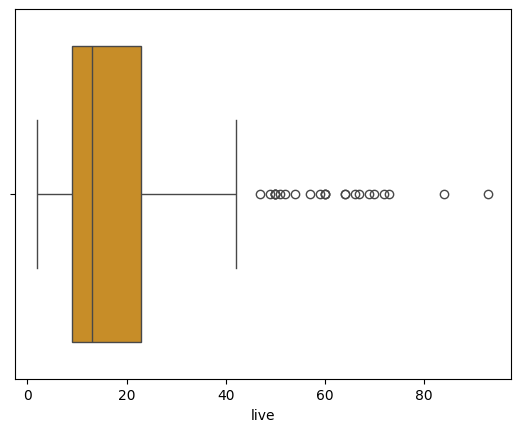


Scatterplot will show us relationship between live and pop:



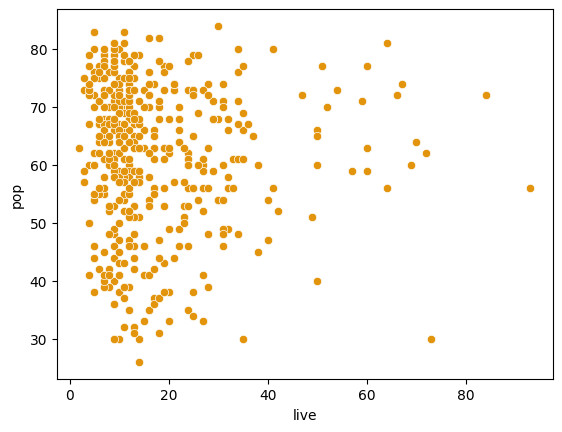

Summary stats for val:

count    438.000000
mean      59.625571
std       24.480160
min        6.000000
25%       42.250000
50%       61.000000
75%       80.000000
max       99.000000
Name: val, dtype: float64

Boxplot will show us spread and highlight outliers:



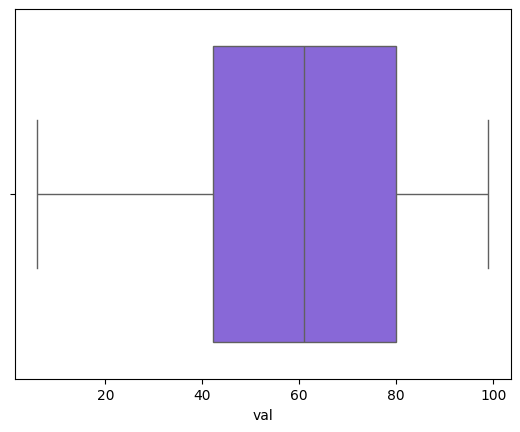


Scatterplot will show us relationship between val and pop:



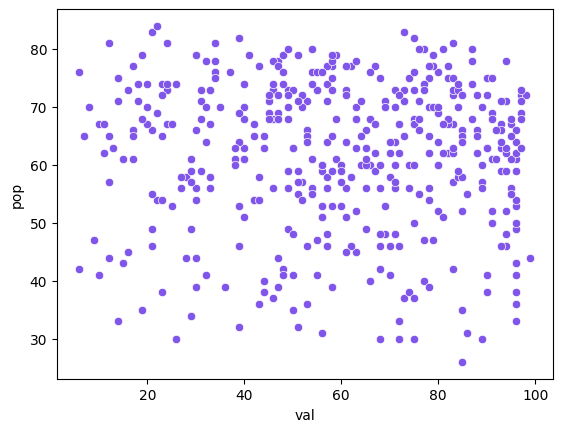

Summary stats for dur:

count    438.000000
mean     228.267123
std       63.426812
min       98.000000
25%      184.500000
50%      224.000000
75%      264.000000
max      511.000000
Name: dur, dtype: float64

Boxplot will show us spread and highlight outliers:



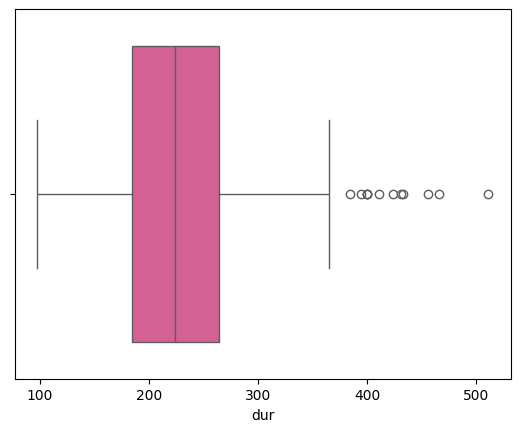


Scatterplot will show us relationship between dur and pop:



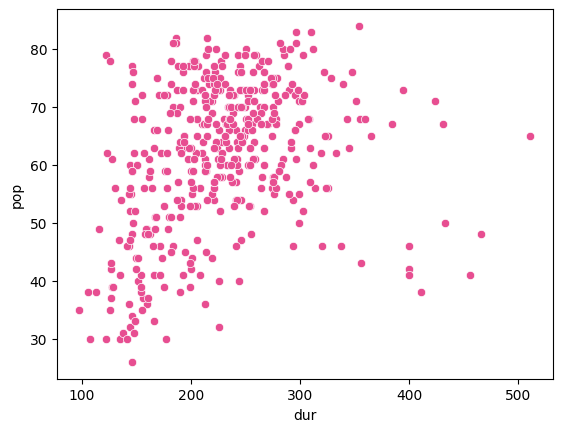

Summary stats for acous:

count    438.000000
mean      32.191781
std       29.279912
min        0.000000
25%        7.000000
50%       23.000000
75%       57.000000
max       99.000000
Name: acous, dtype: float64

Boxplot will show us spread and highlight outliers:



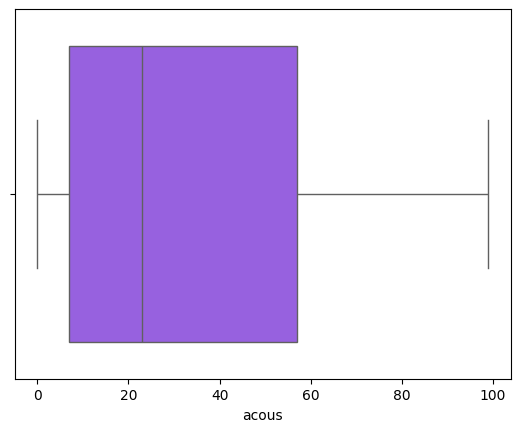


Scatterplot will show us relationship between acous and pop:



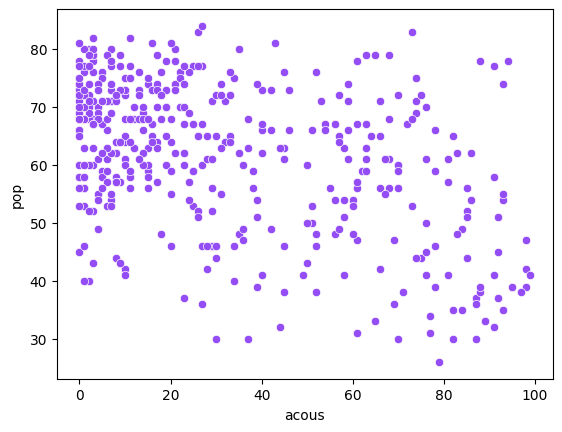

Summary stats for spch:

count    438.000000
mean       5.671233
std        5.571392
min        2.000000
25%        3.000000
50%        4.000000
75%        6.000000
max       47.000000
Name: spch, dtype: float64

Boxplot will show us spread and highlight outliers:



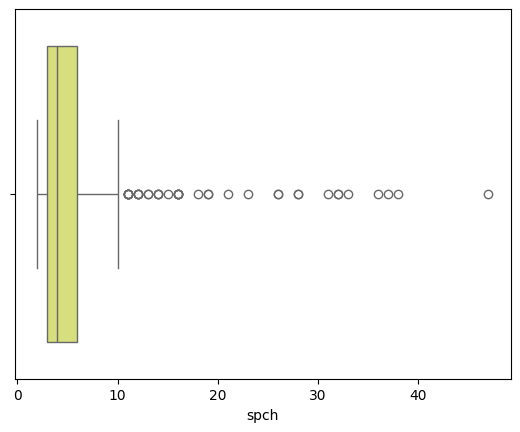


Scatterplot will show us relationship between spch and pop:



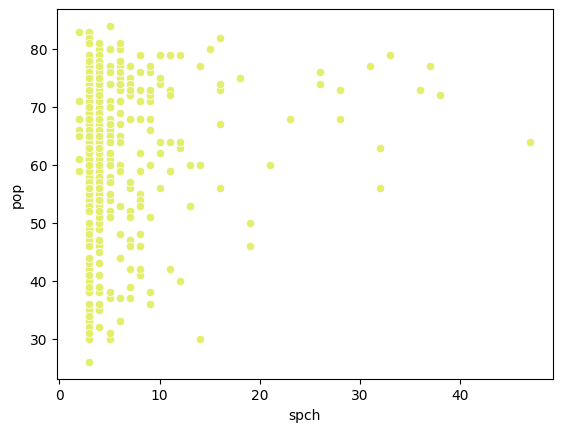

In [ ]:
def feature_plotting(feature_name, target):

  colour = np.random.rand(3,)

  print('Summary stats for {}:\n'.format(feature_name) )
  print(train_data[feature_name].describe())
  plt.show()
  print('\nBoxplot will show us spread and highlight outliers:\n')
  sns.boxplot(x = train_data [feature_name], color = colour)
  plt.show()
  print('\nScatterplot will show us relationship between {} and {}:\n'.format(feature_name, target))
  sns.scatterplot(data=train_data,x = train_data[feature_name], y = train_data[target], color = colour)
  plt.show()

features = ['year', 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop']
for feature in features:
    if feature != 'pop':  # avoid pop vs pop
        feature_plotting(feature, 'pop')

Boxplots reflect the skewed distributions and pinpoint outliers in features like spch and dur.
Meanwhile, scatterplots (shown next) help visualize how these variables relate to pop and whether the outliers significantly affect any trends. And from the scatterplots we see evidence of a mild positive relationship between popularity and features like dur and dB, while acous shows a clearer negative trend. Other features (like dnce, bpm, and val) appear more loosely scattered, hinting at weaker direct correlations with pop.

<a id="feature_engineering"></a>

## Data Preparation and Feature Engineering

---
This section focus on data preprocessing for the upcoming machine learning model training in the next section by transforming and encoding the data.

### Scale Features
Features (e.g., dur can be around 200 seconds, whereas acous and val can range 0–100, and dB is often negative) exist on very different numeric scales. Additionally, some distributions are quite skewed. By standardizing (subtracting the mean and dividing by the standard deviation), we bring each feature onto a comparable scale (centered around zero, with unit variance).

This scaling reduces bias toward features with larger numeric ranges and often helps gradient‐based methods converge more reliably and faster. It also makes the model’s learning process less sensitive to the original, arbitrary units of measurement.

In [ ]:
# feature columns and target column
features = ['year', 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop']
target = 'top genre'

X_train = train_data[features].values
y_train = train_data[target].values

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # scale features for training dataset

X_test = test_data[features].values # scale test dataset
X_test_scaled = scaler.transform(X_test)

### Encoding Categorical Variables
Label encoding is converting each categorical label (e.g. “Pop,” “Rock,” “Jazz”) into a numeric code, so the model can work with them as integer class labels. Neural networks (and most machine learning algorithms) require the target to be numeric rather than strings, so LabelEncoder maps each unique text label to an integer under the hood.

In [ ]:
# Encode categorical variables
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
num_classes = len(label_encoder.classes_)
print("Number of classes:", num_classes)

Number of classes: 86


### Convert into pyTorch dataset and Dataloader
The scaled training data and corresponding labels are converted into a PyTorch Dataset, and then wraps it in a DataLoader that handles batching and shuffling. A simple dataset class is used instead of feeding x and y batches into the neural network in a custom training loop because it is idomatic way and also saves a lot of boilerplate. It makes the code more maintainable.

In [ ]:
class Dataset(Dataset):
    def __init__(self, X, y=None):
        self.X = torch.tensor(X, dtype=torch.float32)
        if y is not None:
            self.y = torch.tensor(y, dtype=torch.long)
        else:
            self.y = None
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        if self.y is not None:
            return self.X[idx], self.y[idx]
        else:
            return self.X[idx]

train_dataset = Dataset(X_train_scaled, y_train_enc)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = Dataset(X_test_scaled)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

<a id='modeling'></a>

## Modeling

---
Neural network is choosen for this classification task because it offer advantages to predict the top genre, particularly when dealing with complex and high dimensional data. Unlike logistic regression, which relies on a linear combination of features and may require extensive manual feature engineering to capture intricate patterns, neural network can automatically learn these non-linear interactions through its multi-layer architecture and activation functions. While ensemble methods like random forest and gradient boosting classifier are also capable of handling non-linearities, they often depend on a series of decision trees and can sometimes be sensitive to noise or require careful tuning to avoid overfitting, especially when data is limited. Similarly, Support Vector Machines (SVMs) can perform well on smaller datasets but hinge critically on the choice of kernel and parameter settings, potentially making them less intuitive when the underlying relationships are not well understood. In contrast, neural network offer a more adaptable framework; for example, the use of dropout in our model provides built-in regularization that helps mitigate overfitting, even with a modest amount of data. This inherent flexibility allows the network to learn subtle patterns and feature interactions directly from the data, making it a robust choice for the classification task at hand despite the dataset’s size.

This neural network is a feed-forward model with four hidden layers sized at 1024, 512, 256, and 128 neurons respectively. Each hidden layer uses a ReLU activation function, followed by dropout at a rate of 0.5 to help reduce overfitting. The final layer outputs logits for each class, which are then passed through a softmax to produce class probabilities. The network is trained for 50 epochs using the Adam optimizer and cross-entropy loss.

In [ ]:
# Neural Network
class NeuralNet(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dims, dropout, epochs, lr,
                 bagging=False, bagging_fold_fitting=False, **kwargs):
        super(NeuralNet, self).__init__()
        self.input_dim = input_dim  # number of features
        self.output_dim = output_dim
        self.hidden_dims = hidden_dims # hidden layer sizes
        self.dropout = dropout  # dropout probability for regularization 
        self.epochs = epochs
        self.lr = lr    # learning rate
        self.bagging = bagging
        self.bagging_fold_fitting = bagging_fold_fitting
        self.model = self._build_network()
    
    def _build_network(self):
        layers = []
        in_dim = self.input_dim
        for h in self.hidden_dims:
            layers.append(nn.Linear(in_dim, h)) # linear transformation layer
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(self.dropout))
            in_dim = h
        layers.append(nn.Linear(in_dim, self.output_dim))
        return nn.Sequential(*layers)
    
    def forward(self, x):
        return self.model(x)
    
    def fit(self, train_loader, val_loader=None):
        optimizer = optim.Adam(self.parameters(), lr=self.lr) # Adam optimizer
        loss_fn = nn.CrossEntropyLoss() # Cross entropy loss
        self.train()
        for epoch in range(self.epochs):    # iterate through the assigned number of epochs
            epoch_loss = 0.0
            correct = 0
            total = 0
            for X_batch, y_batch in train_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                optimizer.zero_grad()   # reset gradients for the current batch
                outputs = self.forward(X_batch)
                loss = loss_fn(outputs, y_batch)
                loss.backward()
                optimizer.step()
                epoch_loss += loss.item() * X_batch.size(0)
                _, predicted = torch.max(outputs, 1)
                total += y_batch.size(0)
                correct += (predicted == y_batch).sum().item()
            train_loss = epoch_loss / total # average loss over epoch
            train_acc = correct / total  # average accuracy over epoch
            print(f"Epoch {epoch+1}/{self.epochs}, Loss: {train_loss:.4f}, Acc: {train_acc:.4f}")
        return self
    
    def predict_proba(self, X):
        self.eval()
        with torch.no_grad():   # disable gradient computation
            outputs = self.forward(X)
            probs = torch.softmax(outputs, dim=1)   # convert raw outputs to probabilities using softmax
        return probs.cpu().numpy()

# define the network with parameters
class NeuralNet_preset(NeuralNet):
    def __init__(self, input_dim, output_dim, hidden_dims=[1024, 512, 256, 128], dropout=0.5, lr=1e-3, **kwargs):
        super(NeuralNet_preset, self).__init__(
            input_dim=input_dim,
            output_dim=output_dim,
            hidden_dims=hidden_dims,
            dropout=dropout,
            epochs=50,
            lr=lr,
            bagging=True,
            bagging_fold_fitting=True,
            **kwargs
        )

device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # Use gpu to training the model if possible

# Model training
input_dim = X_train_scaled.shape[1] # obtain number of features from the scaled dataset
model = NeuralNet_preset(input_dim=input_dim, output_dim=num_classes,
                                  hidden_dims=[1024, 512, 256, 128], dropout=0.5, lr=1e-3).to(device)
model.fit(train_loader)

# Prediction on test data
all_preds = []  
model.eval()
with torch.no_grad():
    for X_batch in test_loader:
        X_batch = X_batch.to(device)
        probs = model.predict_proba(X_batch)
        preds = np.argmax(probs, axis=1)
        all_preds.extend(preds)

all_preds_labels = label_encoder.inverse_transform(np.array(all_preds)) # Convert prediction back to original label

# Export csv
submission = pd.DataFrame({'Id': test_data['Id'], 'top genre': all_preds_labels})
submission.to_csv('submission.csv', index=False)
print("Submission CSV saved as 'submission.csv'")


Epoch 1/50, Loss: 4.3454, Acc: 0.0845
Epoch 2/50, Loss: 3.8302, Acc: 0.1416
Epoch 3/50, Loss: 3.6743, Acc: 0.1918
Epoch 4/50, Loss: 3.5258, Acc: 0.2466
Epoch 5/50, Loss: 3.3965, Acc: 0.2831
Epoch 6/50, Loss: 3.3398, Acc: 0.2808
Epoch 7/50, Loss: 3.2449, Acc: 0.3037
Epoch 8/50, Loss: 3.2120, Acc: 0.3356
Epoch 9/50, Loss: 3.1141, Acc: 0.3379
Epoch 10/50, Loss: 3.0526, Acc: 0.3402
Epoch 11/50, Loss: 3.0647, Acc: 0.3219
Epoch 12/50, Loss: 3.0330, Acc: 0.3425
Epoch 13/50, Loss: 2.9176, Acc: 0.3493
Epoch 14/50, Loss: 2.8563, Acc: 0.3539
Epoch 15/50, Loss: 2.9211, Acc: 0.3562
Epoch 16/50, Loss: 2.8041, Acc: 0.3470
Epoch 17/50, Loss: 2.7911, Acc: 0.3493
Epoch 18/50, Loss: 2.7639, Acc: 0.3447
Epoch 19/50, Loss: 2.7121, Acc: 0.3470
Epoch 20/50, Loss: 2.6657, Acc: 0.3607
Epoch 21/50, Loss: 2.6134, Acc: 0.3927
Epoch 22/50, Loss: 2.6347, Acc: 0.3539
Epoch 23/50, Loss: 2.5986, Acc: 0.3721
Epoch 24/50, Loss: 2.5962, Acc: 0.3630
Epoch 25/50, Loss: 2.5271, Acc: 0.3676
Epoch 26/50, Loss: 2.4951, Acc: 0.

From the training logs, the model shows a steady improvement in accuracy from around 8% to over 41% by the 50th epoch, while the loss decreases from about 4.35 to 1.93. This indicates that the network is indeed learning non-trivial patterns in the data rather than guessing randomly Without a validation or test metric, it’s hard to assess how well the model is.

<a id='conclusion'></a>

## Conclusions

---
In this project, we explored how both numeric and categorical features could be leveraged to classify the top genre of songs. By cleaning the dataset—removing irrelevant columns, handling missing values, and applying transformations to reduce skewness and standardize feature distributions—we aimed to ensure that our data was well-prepared for modeling.

Several classification models were tested, including traditional approaches Logistic regression, SVM, Random Forest, and Gradient Boosting as well as a neural network. The neural network, featuring four hidden layers (with sizes of 1024, 512, 256, and 128) and dropout regularization, was trained using cross-entropy loss and the Adam optimizer for 50 epochs. This model successfully captured non-linear patterns in the data, steadily reducing the training loss and improving accuracy over time.

However, the final accuracy highlights opportunities for further enhancement. Potential steps include hyperparameter tuning (adjusting learning rate, dropout probability, or batch size), experimenting with alternative architectures, or incorporating additional domain-specific features (such as artist popularity or user engagement metrics). Moreover, the relatively small size of the dataset and the subjective nature of the “top genre” label may limit the model’s generalizability. Acquiring more diverse data—from different time periods, regions, or music platforms—could lead to improved performance and more robust insights into genre classification.

Despite these constraints, the project demonstrates that machine learning models can extract meaningful signals from music-related features. Overall, this work lays a foundation for future research into more nuanced feature engineering and larger-scale data collection to refine genre classification models further.
